In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier


In [69]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# EDA and Visulisation 

In [70]:
df.isna().sum()
## required action-no action required

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
df.duplicated().sum()
#required action-drop duplicate items

723

In [72]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [73]:
nu_col=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_col=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal','ca']



In [74]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Univariate Analysis ##

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

*1.For numerical data*

In [76]:
## plot distrubution curve+box plot for outlires

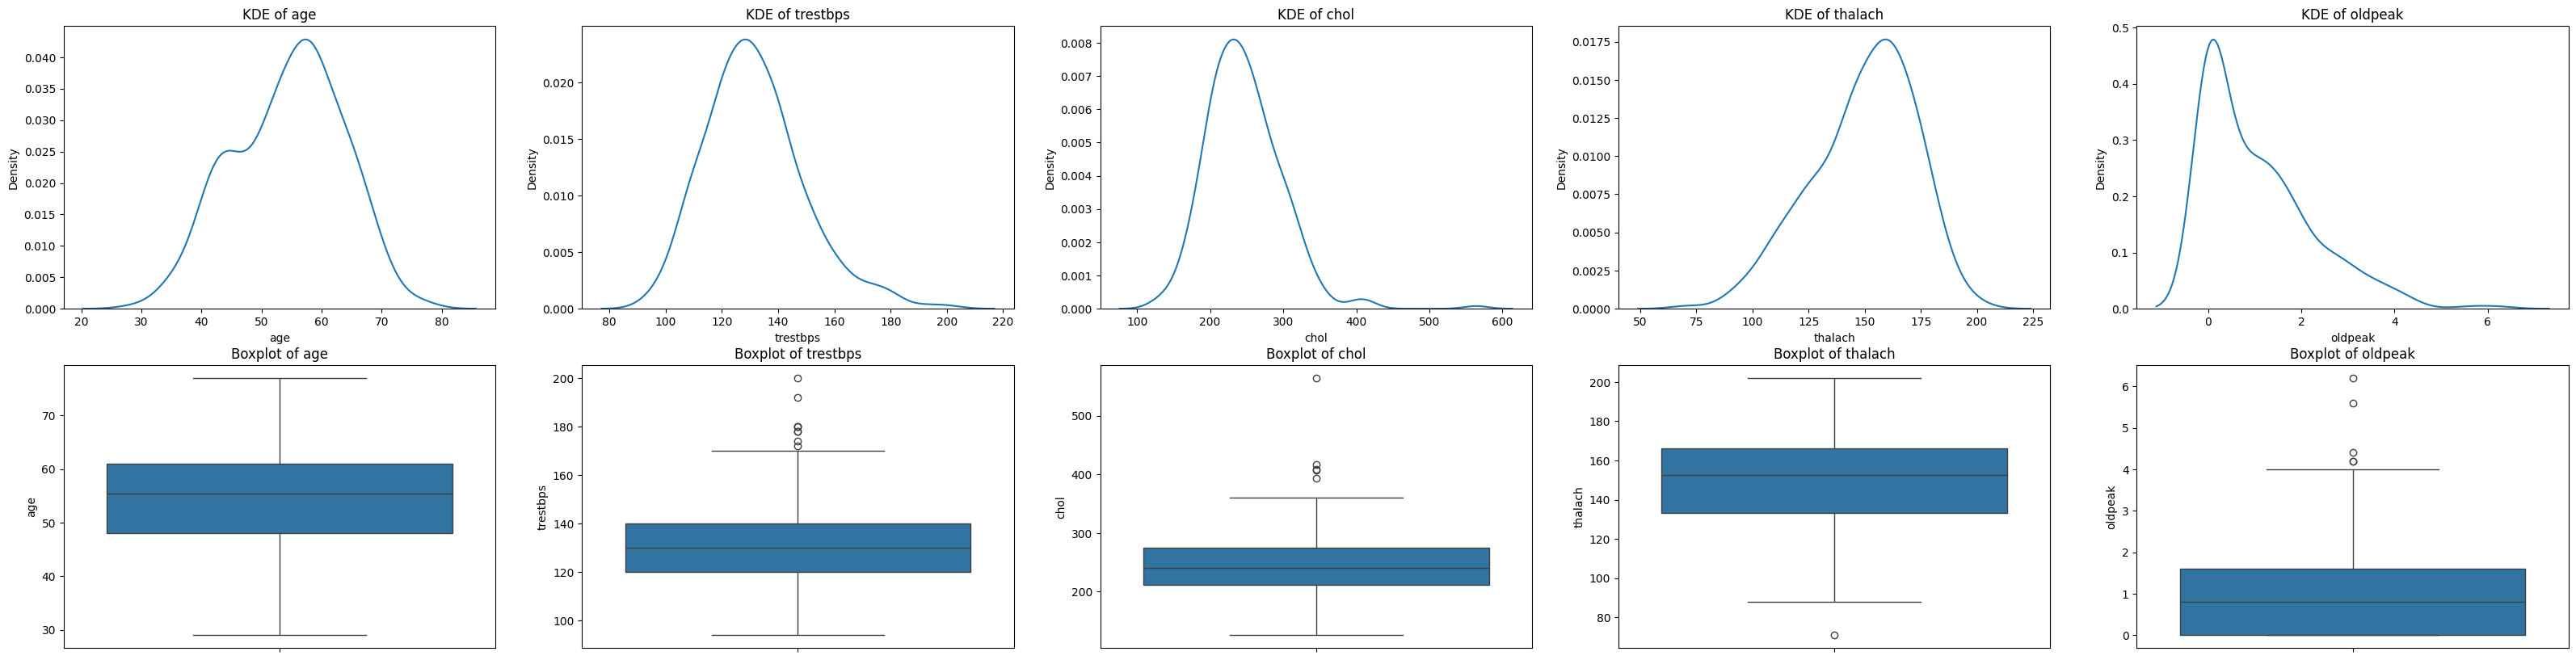

In [77]:
def plotnu(df, nu_col):
    n = len(nu_col)
    fig, axes = plt.subplots(2, n, figsize=(8 * n, 10)) 

    for i, col in enumerate(nu_col):
        sns.kdeplot(df[col], ax=axes[0, i])
        axes[0, i].set_title(f'KDE of {col}')
        sns.boxplot(y=df[col], ax=axes[1, i])
        axes[1, i].set_title(f'Boxplot of {col}')

  
plotnu(df,nu_col)

In [78]:
## checking skewness
skew=[]
for col in nu_col:
    skew.append(df[col].skew())
arr=np.array(skew)
arr=arr.reshape(1,5)
skewed=pd.DataFrame(arr,columns=nu_col,index=["Skewness"])
skewed



,age,trestbps,chol,thalach,oldpeak
Skewness,-0.203743,0.716541,1.147332,-0.532671,1.266173


these outlires are not harmfull as in real life this kind of data we can expect from patient 

*for cat data*

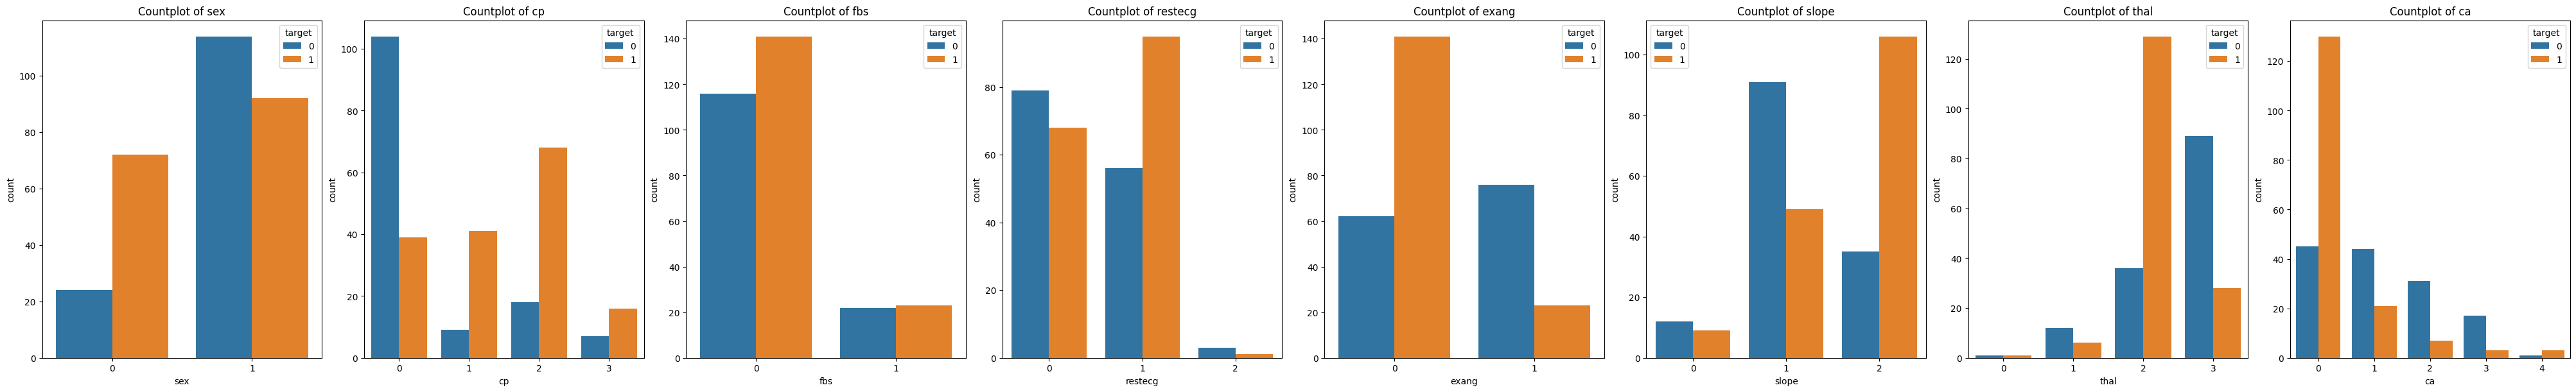

In [79]:
def countplot(df, cat_col):
    n = len(cat_col)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 6), constrained_layout=True)
    for i, col in enumerate(cat_col):
        sns.countplot(x=col, data=df, ax=axes[i],hue=df['target'])
        axes[i].set_title(f'Countplot of {col}')
      

    plt.show()
countplot(df,cat_col)

In [80]:
### checking for inbalanced data
f=df['target'].value_counts()[0]
t=df['target'].value_counts()[1]
print(f'true={(t/(f+t))*100}')
print(f'false={(f/(f+t))*100}')


true=54.3046357615894
false=45.6953642384106


# 2.Multivariate 

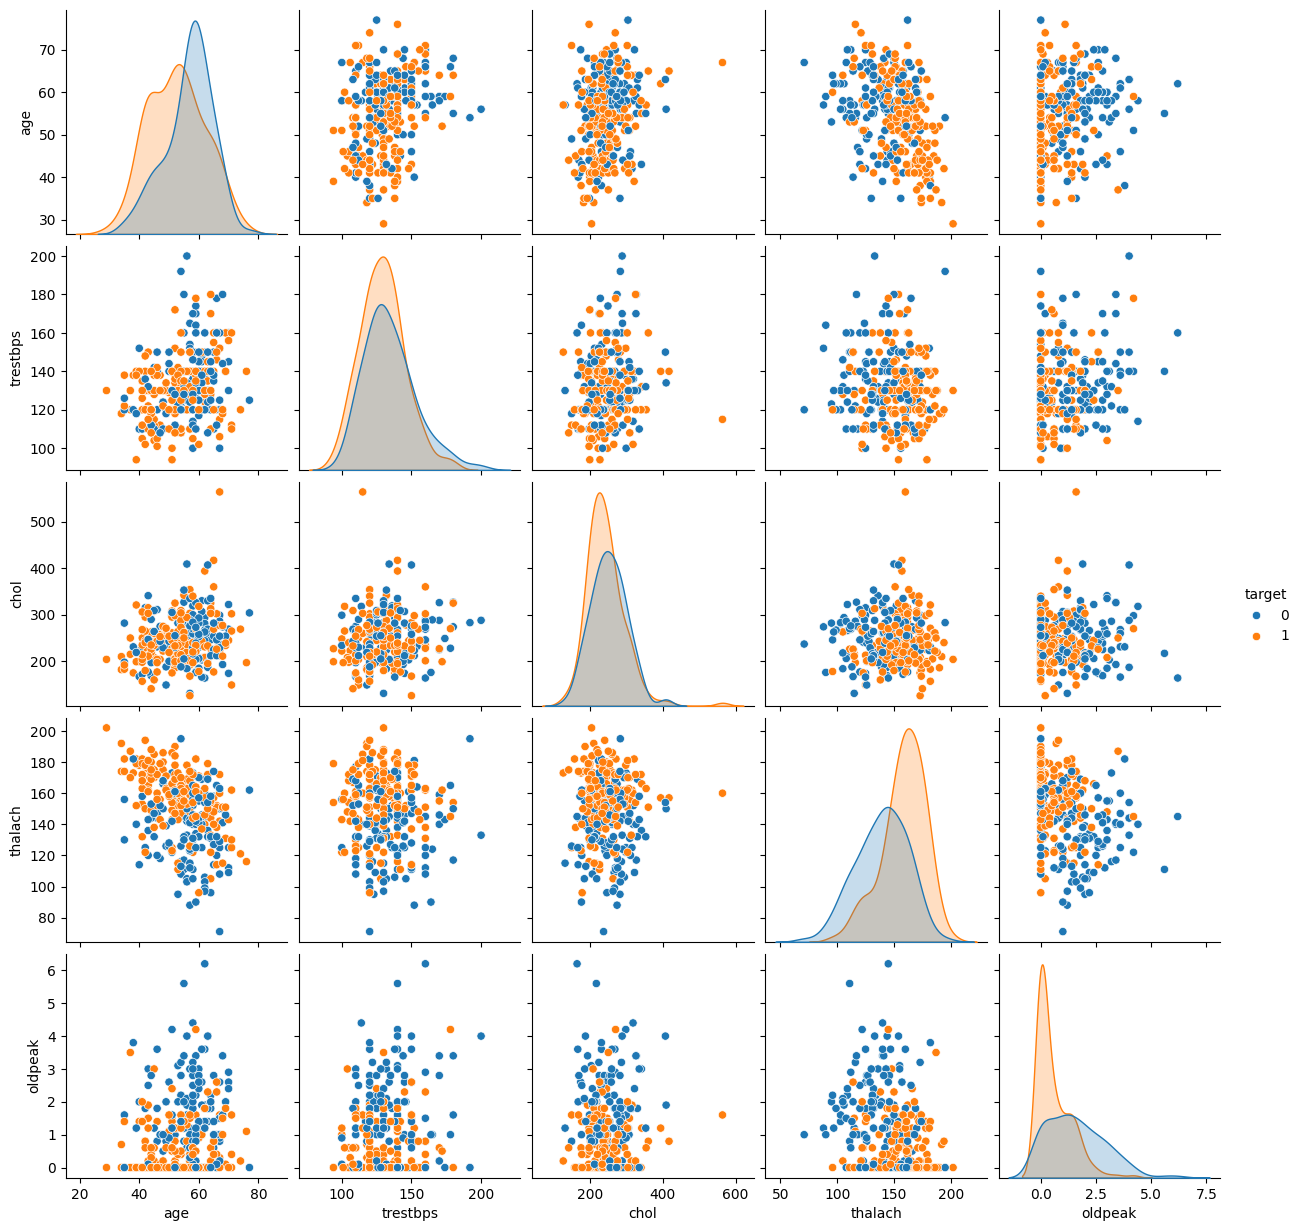

In [150]:
plot = sns.pairplot(df[nu_col + ['target']], hue='target')


In [ ]:
df.corr()['target']


age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

# Data Preprocessing #

In [83]:
x = df.drop('target', axis=1)

y = df['target']


In [127]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=33)
print(f"Shape of X_train: {xtrain.shape}")
print(f"Shape of X_test: {xtest.shape}")
ytrain.value_counts()

Shape of X_train: (241, 13)
Shape of X_test: (61, 13)


target
1    131
0    110
Name: count, dtype: int64

In [128]:
# # aplying standard scaling for all nu_col except age

scaler = ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),['trestbps','oldpeak', 'thalach'])
   
], remainder='passthrough')

pd2=scaler.fit_transform(xtrain)
pt2=scaler.transform(xtest)

# Train Models #

In [129]:
# Define your models and basic params
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=100,solver='liblinear',penalty='l2'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=10),
    'Naive Bayes': GaussianNB(var_smoothing=1e-9),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'random_forest':RandomForestClassifier(n_estimators=100,criterion='gini')
}

In [130]:
## evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

In [131]:
results = {}

for name, model in classifiers.items():
    model.fit(pd2, ytrain)
    y_pred = model.predict(pt2)
    accuracy, precision, recall, f1 = evaluate_model(ytest, y_pred)
    scores = cross_val_score(model, pd2, ytrain, cv=5, scoring='f1')
    results[name] = {'Accuracy': accuracy,
                     'Precision': precision,
                     'Recall': recall,
                     'F1 Score': f1,
                     'CV': scores.mean()}

    print(f"--- Model: {name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}")
    print(f"Precision: {precision* 100:.2f}")
    print(f"Recall: {recall* 100:.2f}")
    print(f"F1 Score: {f1* 100:.2f}")
    print(f"Cross-Validation F1 Scores: {scores.mean() * 100:.2f}")
    print()

--- Model: Logistic Regression ---
Accuracy: 78.69
Precision: 77.78
Recall: 84.85
F1 Score: 81.16
Cross-Validation F1 Scores: 86.08

--- Model: Decision Tree ---
Accuracy: 75.41
Precision: 73.68
Recall: 84.85
F1 Score: 78.87
Cross-Validation F1 Scores: 76.56

--- Model: Naive Bayes ---
Accuracy: 81.97
Precision: 82.35
Recall: 84.85
F1 Score: 83.58
Cross-Validation F1 Scores: 83.42

--- Model: K-Nearest Neighbors ---
Accuracy: 65.57
Precision: 65.00
Recall: 78.79
F1 Score: 71.23
Cross-Validation F1 Scores: 65.64

--- Model: random_forest ---
Accuracy: 81.97
Precision: 82.35
Recall: 84.85
F1 Score: 83.58
Cross-Validation F1 Scores: 84.38



# we will proceed with Logistic regression+Random forest +Naive Bayes algorithm with voting classifier

In [132]:
# Hypertunig of parameters for random forest
model=RandomForestClassifier(n_estimators=100,criterion='gini')
param_grid = {
    'n_estimators': [50,100, 500, 1000],          
   'max_depth': [None, 10,5],                     
                
    'max_features':['sqrt', 'log2', None],
}
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='f1', n_jobs=-1)
grid_search.fit(pd2, ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best CV F1 Score: 0.852006919006919


In [133]:
# Hypertunig of parameters for lr
lr=LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2'],                     # Type of penalty
    'solver': ['liblinear'],                     # liblinear supports l1 and l2
    'max_iter':[100,1000,5000,10000],
}
grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='f1', n_jobs=-1)
grid_search.fit(pd2, ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best CV F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV F1 Score: 0.8631244473916887


In [134]:

# Base models
lr = LogisticRegression(max_iter=100,C=0.1,penalty='l2',solver='liblinear')
rf = RandomForestClassifier(
    n_estimators=500,      
    max_depth=5,        
    criterion='gini',      
    max_features='sqrt',   
    random_state=42        
)
nb = GaussianNB(var_smoothing=1e-9)

# Voting classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('nb', nb)
    ],
    voting='soft'  
)



In [135]:
p1=Pipeline([
('scaling',scaler),
 ('train',voting_clf)
 ])
p1.fit(xtrain,ytrain)



C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['trestbps', 'oldpeak',
                                                   'thalach'])])),
                ('train',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=0.1,
                                                                  solver='liblinear')),
                                              ('rf',
                                               RandomForestClassifier(max_depth=5,
                                                                      n_estimators=500,
                                                                      random_state=42)),
                                              ('nb', GaussianNB())],
                                  voting='soft'))])

### Predicting training data ###

In [136]:
pred_train=p1.predict(xtrain)
print(classification_report(ytrain ,pred_train))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       110
           1       0.87      0.93      0.90       131

    accuracy                           0.89       241
   macro avg       0.89      0.88      0.89       241
weighted avg       0.89      0.89      0.89       241



In [137]:
np.mean(cross_val_score(p1,xtrain,ytrain,cv=10,scoring='recall'))

0.9027472527472528

In [138]:
pd.DataFrame(confusion_matrix(ytrain,pred_train,labels=[1, 0]),columns=['positive(pred)','negetive(pred)'],index=['positive(actual)','negetive(actual)'])

,positive(pred),negetive(pred)
positive(actual),122,9
negetive(actual),18,92


### Predicting test data


In [139]:
pred_test=p1.predict(xtest)
print(classification_report(ytest ,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [140]:
pd.DataFrame(confusion_matrix(ytest,pred_test,labels=[1, 0]),columns=['positive(pred)','negetive(pred)'],index=['positive(actual)','negetive(actual)'])

,positive(pred),negetive(pred)
positive(actual),29,4
negetive(actual),6,22


### exporting model

In [141]:
import pickle


with open('model.pkl', 'wb') as f:
    pickle.dump(p1, f)